<a href="https://colab.research.google.com/github/Justin-Jonany/FLARE_Implementation/blob/main/notebooks_and_demonstration/2_FLARE_for_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FLARE
A simple demonstration of FLARE to create a more accurate summary of Scientif Journals! This will be used as a documentation for the FLARE_Implementation notebook and the readme page in GitHub.

All functions can be accessed in my github repository: [github.com/Justin-Jonany/FLARE_Implementation](https://github.com/Justin-Jonany/FLARE_Implementation)

# Libraries

In [ ]:
!git clone https://github.com/Justin-Jonany/FLARE_Implementation.git

Cloning into 'FLARE_Implementation'...
remote: Enumerating objects: 242, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 242 (delta 126), reused 177 (delta 72), pack-reused 0 (from 0)
Receiving objects: 100% (242/242), 6.92 MiB | 13.56 MiB/s, done.
Resolving deltas: 100% (126/126), done.


In [ ]:
pip install langchain langchain_chroma langchain_core langchain_openai langchain_text_splitters pymupdf4llm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 435.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.0/604.0 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.0/383.0 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from langchain_chroma import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import userdata
from IPython.display import Markdown
import pymupdf4llm
from FLARE_Implementation.flare import *

# Summary Construction

## Creating the Retriever
To create the retriever, I'm going to split the PDFs by page using PymuPDF4LLM and put them in the vector database.

### Splitting the PDF by page

In [ ]:
pdf_path = 'FLARE_Implementation/Active Retrieval Augmented Generation.pdf'

In [ ]:
pages = pymupdf4llm.to_markdown(pdf_path, page_chunks=True)

Processing FLARE_Implementation/Active Retrieval Augmented Generation.pdf...
[                                        ] (0/24)=[=                                       ] ( 1/24)==[===                                     ] ( 2/24)==[=====                                   ] ( 3/24)=[======                                  ] ( 4/24)==[========                                ] ( 5/24)==[==========                              ] ( 6/24)

In [ ]:
pages_text = [page['text'] for page in pages]
df_pages_text = pd.DataFrame(pages_text, columns=['text'])
df_pages_text['characters count'] = df_pages_text['text'].apply(lambda x: len(x))
df_pages_text['words count'] = df_pages_text['text'].apply(lambda x: len(x.split()))
df_pages_text['lines count'] = df_pages_text['text'].apply(lambda x: len(x.split('\n')))
df_pages_text

,text,characters count,words count,lines count
0,## Active Retrieval Augmented Generation\n\n##...,4290,606,81
1,Figure 1: An illustration of forward-looking a...,3024,458,52
2,sidering the impressive performance achieved b...,4555,689,107
3,Search results: !!\n\n[1]: …Search results:\n...,3821,610,120
4,Joe Biden attended the University of Pennsylva...,4212,606,120
5,"2023), which retrieve every few tokens, and KN...",4559,691,88
6,Figure 4: Comparision between FLARE and baseli...,3755,528,82
7,|Datasets StrategyQA Metrics EM|ASQA EM D-F R-...,4242,627,106
8,_β_ **EM** **F1** **Prec.** **Rec.**\n\n0.0 0....,4388,643,102
9,"### References\n\nSebastian Borgeaud, Arthur M...",6710,737,128


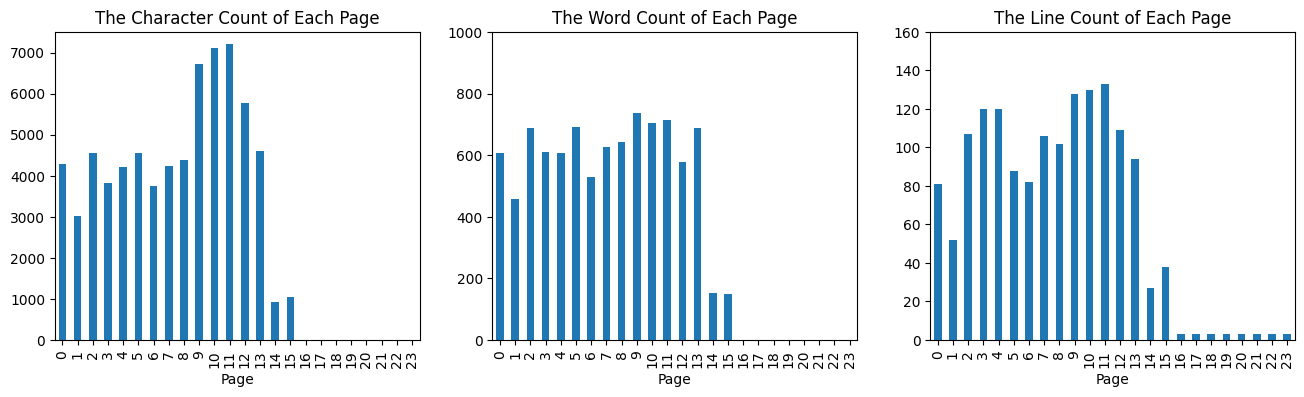

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
df_pages_text['characters count'].plot(kind='bar')
plt.title('The Character Count of Each Page')
plt.ylim(0, 7500)
plt.xlabel('Page')

plt.subplot(1, 3, 2)
df_pages_text['words count'].plot(kind='bar')
plt.ylim(0, 1000)
plt.title('The Word Count of Each Page')
plt.xlabel('Page')

plt.subplot(1, 3, 3)
df_pages_text['lines count'].plot(kind='bar')
plt.ylim(0, 160)
plt.title('The Line Count of Each Page')
plt.xlabel('Page')
plt.show()

### Chunking and Putting it Vector Database

In [ ]:
def flatten(xss):
    return [x for xs in xss for x in xs]

In [ ]:
# recursive text splitter object
recursive_text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n","\n", " "],
    chunk_size = 1200,
    chunk_overlap = 150,
    is_separator_regex=False
)

# splits
splits = flatten([recursive_text_splitter.create_documents(texts=[df_pages_text.loc[df_pages_text.index[i]].text]) for i in range(len(df_pages_text))])


# storing them into the vector database
embeddings = OpenAIEmbeddings(api_key=userdata.get('OPENAI_API_KEY'))
vector_store = Chroma(
    collection_name="rmib",
    embedding_function=embeddings,
)
vector_store.add_documents(documents=splits, ids=[f'id_{i}' for i in range(1, len(splits) + 1)]);

# retriever
retriever = vector_store.as_retriever(search_kwargs={"k": 9})

## Constructing the Summaries

In [ ]:
question = """
I'm not the author of FLARE, but I'm creating my take on the implementation of the paper. I need a 150 words summary using third person POV of the paper, talking about the background, the goal, what is FLARE, and how it works.
"""
original_answer, questions_construction, reconstructed_answer = flare(question, retriever, userdata.get('OPENAI_API_KEY'))

/content/FLARE_Implementation/flare.py:41: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  context = retriever.get_relevant_documents(question)


Acquiring answer with traditional RAG...
Finding uncertain tokens, and annotating the answer...
Constructing questions for the annotated tokens...
Extracting constructed questions...
Answering each questions...
Reconstructing the final answer...


In [ ]:
display(Markdown(original_answer.choices[0].message.content))

The paper explores the limitations of existing retrieval-augmented language models, which typically execute a single retrieval based solely on user input. Recognizing the need for continual information gathering to enhance long-form text generation, the authors propose Forward-Looking Active Retrieval Augmented Generation (FLARE). This method allows for an iterative approach, where the model generates a provisional next sentence to identify low-confidence tokens and selectively retrieves relevant information to refine its output. FLARE operates through two main strategies: FLAREinstruct, which prompts the model to generate retrieval queries when necessary, and FLAREdirect, where the model’s generative output informs search queries directly. The authors empirically validate FLARE across multiple knowledge-intensive tasks and demonstrate its superior performance compared to traditional retrieval methods, emphasizing its effectiveness in delivering contextually rich and accurate information during the generation process.

In [ ]:
display(Markdown(questions_construction.choices[0].message.content))

1. [Search(What are the limitations of existing retrieval-augmented language models?)] input. 
2. [Search(Why is continual information gathering needed for long-form text generation?)] text generation, the authors propose Forward-Looking Active Retrieval Augmented Generation (FLARE). 
3. [Search(What is the iterative approach in FLARE?)]. 
4. [Search(How does the model generate a provisional next sentence and identify low-confidence tokens?)] refine its output. 
5. [Search(What are the two main strategies used in FLARE?)]: FLAREinstruct, which prompts the model to generate retrieval queries [Search(What conditions trigger the model to generate retrieval queries in FLAREinstruct?)] and FLAREdirect, where the model’s generative output informs [Search(How does the model’s generative output influence search queries in FLAREdirect?)] [Search(What is the method of FLARE and how does it utilize search queries?)]. 
6. [Search(How do the authors validate FLARE across multiple knowledge-intensive tasks?)] demonstrate its superior performance compared [Search(How does FLARE's performance compare to traditional retrieval methods?)], emphasizing its effectiveness in delivering contextually rich and accurate information during [Search(How does FLARE enhance the generation process to provide accurate information?)] the generation process.

In [ ]:
display(Markdown(reconstructed_answer.choices[0].message.content))

The paper explores the limitations of existing retrieval-augmented language models, which typically execute a single retrieval based solely on user input, leading to inaccurate and contextually irrelevant outputs. Recognizing the need for continual information gathering to enhance long-form text generation, the authors propose Forward-Looking Active Retrieval Augmented Generation (FLARE). This method employs an iterative approach, where the model generates a provisional next sentence to identify low-confidence tokens and selectively retrieves relevant information to refine its output. FLARE operates through two main strategies: FLAREinstruct, which prompts the model to create retrieval queries as needed, and FLAREdirect, where the model’s generative output directly informs search queries. The authors empirically validate FLARE across multiple knowledge-intensive tasks and demonstrate its superior performance compared to traditional retrieval methods, emphasizing its effectiveness in enriching the generation process with accurate, contextually rich information that adapts to the evolving needs of text generation.